In [1]:
#auto reload modules 
%load_ext autoreload
%autoreload 2


In [2]:
import torch 
torch.cuda.is_available()

True

In [3]:
from cassie import CassieEnv
from constants import *
import mediapy as media
import functions as f 
import matplotlib.pyplot as plt
plt.set_loglevel("info") 
import warnings 
warnings.filterwarnings('ignore')

c:\Users\alhussein Jamil\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
DEBUG:matplotlib:matplotlib data path: c:\Users\alhussein Jamil\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\alhussein Jamil\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\alhussein Jamil\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\alhussein Jamil\.matplotlib\fontlist-v330.json


In [66]:
ex_nested_dict = {
    "a": 1,
    "b": 2,
    "c": {
        "d": 3,
        "e": 4,
        "f": {
            "g": 5,
            "h": 6,
            "i": {
                "j": 7,
                "k": 8,
                "l": {
                    "m": 9,
                    "n": [10, 11, [12, 13]],
                    "o": {
                        "p": 13,
                    }

                }
            }
        }
    }
}
f.flatten_dict(ex_nested_dict)


{'a': 1,
 'b': 2,
 'c_d': 3,
 'c_e': 4,
 'c_f_g': 5,
 'c_f_h': 6,
 'c_f_i_j': 7,
 'c_f_i_k': 8,
 'c_f_i_l_m': 9,
 'c_f_i_l_n': [10, 11, [12, 13]],
 'c_f_i_l_o_p': 13}

In [16]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()
ranges=None

In [42]:
cassie.step(cassie.action_space.sample())
cassie._get_obs(),cassie._get_symmetric_obs()

(array([ 8.71098318e+00,  8.64378068e+00,  4.91514154e-01, -4.84108469e+01,
        -3.77866495e+01,  1.41175206e-02,  3.09427052e+00, -7.55732991e-01,
         6.96615136e+00, -9.87905046e+00, -9.44589165e+00, -1.59152077e+01,
        -4.12016507e+01, -1.08476660e-01,  1.43018295e+00, -8.24033013e-01,
         9.20592099e-01, -1.91430006e-01, -3.39008546e-01,  3.06259069e-02,
        -1.53745043e+00,  4.97810820e+00,  3.56687719e-01,  4.30524043e+01,
        -6.15432916e+00,  5.73344992e+00, -9.30903757e-02, -4.62416607e-01,
        -1.65846506e-01, -9.51056516e-01, -3.09016994e-01]),
 array([ 6.96615136e+00, -9.87905046e+00, -9.44589165e+00, -1.59152077e+01,
        -4.12016507e+01, -1.08476660e-01,  1.43018295e+00, -8.24033013e-01,
         8.71098318e+00,  8.64378068e+00,  4.91514154e-01, -4.84108469e+01,
        -3.77866495e+01,  1.41175206e-02,  3.09427052e+00, -7.55732991e-01,
         9.20592099e-01,  1.91430006e-01, -3.39008546e-01, -3.06259069e-02,
        -1.53745043e+00,  4

In [8]:
import constants as c   

In [15]:
np.array(cassie.data.sensordata).shape

(29,)

In [13]:
print(cassie.data.sensordata)
for key in c.sensor_ranges.keys():
    print(key, cassie.data.sensor(key).data)


[ 9.33546870e-02  2.15704245e-01 -1.05217553e-03 -1.24117588e+01
  3.75970133e-01 -7.41560697e-03  1.00402428e+00  7.51940266e-03
 -1.86041662e-01  1.09779610e-01 -5.89540874e-02 -1.26801109e+01
  3.72904463e-01  7.53225582e-03  1.01001660e+00  7.45808927e-03
  9.99950816e-01  1.65960492e-03  9.53277757e-03 -2.17663100e-03
 -3.01583177e-03  8.53791360e-03 -3.88457182e-03  1.27536908e+00
  1.29476189e+00 -1.66928060e+00  2.16070330e-03 -4.99992508e-01
  1.68027263e-03]
left-hip-roll-input [0.09335469]
left-hip-yaw-input [0.21570425]
left-hip-pitch-input [-0.00105218]
left-knee-input [-12.41175883]
left-foot-input [0.37597013]
left-shin-output [-0.00741561]
left-tarsus-output [1.00402428]
left-foot-output [0.0075194]
right-hip-roll-input [-0.18604166]
right-hip-yaw-input [0.10977961]
right-hip-pitch-input [-0.05895409]
right-knee-input [-12.68011085]
right-foot-input [0.37290446]
right-shin-output [0.00753226]
right-tarsus-output [1.0100166]
right-foot-output [0.00745809]
pelvis-orientat

In [68]:
x = np.linspace(0, 1, 10000)

In [69]:
reg = []
diffs = []
# fig, ax = plt.subplots(10,5,figsize=(16, 20), sharex=True, sharey=True)

for kappa in range(200):
    von_mises = f.p_between_von_mises(a = 0 , b = 0.5, kappa = kappa , x = x) 
    min_diff = np.inf
    min_u = 0
    for j in range(300):
        u = j/10.0
        approx =  1/2+1/2*(np.tanh(u*np.sin(2*np.pi*x)))
        diff = np.mean(np.abs(von_mises-approx))
        if diff < min_diff:
            min_diff = diff
            min_u = u
    reg.append([kappa,min_u])
    diffs.append(min_diff)

In [70]:
phis= np.linspace(0, 1, 50)
von_mises_values = [f.p_between_von_mises(a = 0 , b = 0.5, kappa = 25 , x = phi) for phi in phis]

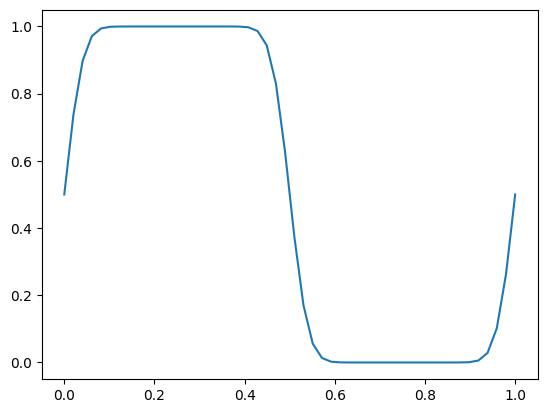

In [71]:
plt.plot(phis,von_mises_values)

a = 6.072980079037679
b = 0.05573903726330689
c = -3.936458863461854
d = 2.365670701763357
The function to use is y = 6.072980 * log(0.055739 * x + 2.365671) + -3.936459


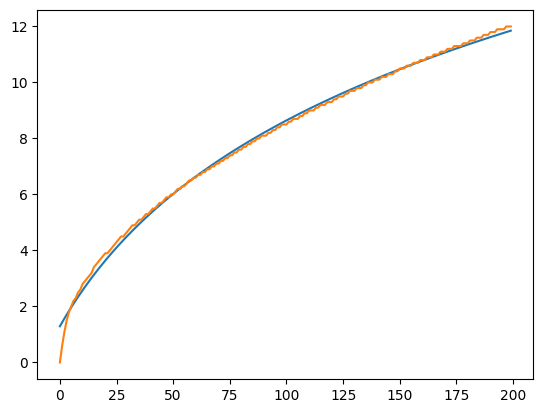

In [72]:
import numpy as np
from scipy.optimize import curve_fit
import math

# Define the logarithmic function
def logarithmic_func(x, a, b, c, d):
    return a * np.log(b * x+ d ) + c

# Input data
data = np.array(reg)

# Extract x and y values from the data
x_data = data[:, 0]
y_data = data[:, 1]

# Make sure x values are positive since we are using logarithms
x_data_positive = np.where(x_data > 0, x_data, 1e-10)

# Fit the data using the logarithmic function
params, _ = curve_fit(logarithmic_func, x_data_positive, y_data)

# Extract the coefficients
a, b, c,d= params

# Print the coefficients
print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)
plt.plot(x_data, logarithmic_func(x_data, a, b, c,d))
plt.plot(x_data, y_data)
print("The function to use is y = {:1f} * log({:1f} * x + {:1f}) + {:1f}".format(a, b, d, c))

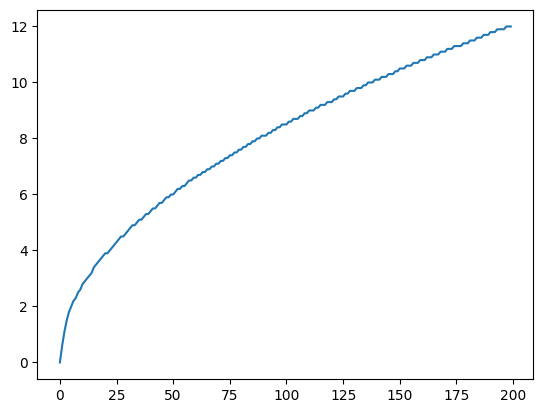

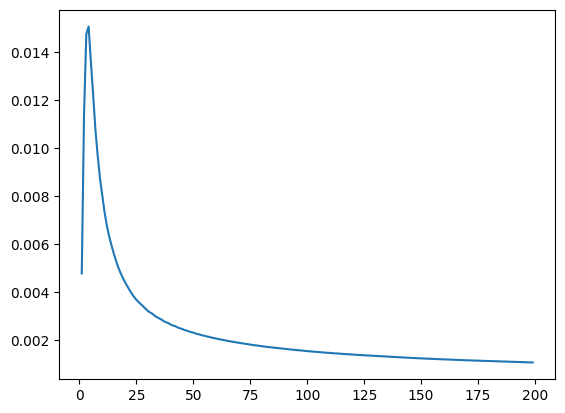

In [73]:
plt.plot(np.array(reg)[:,0], np.array(reg)[:,1])
plt.show()
plt.plot(diffs)

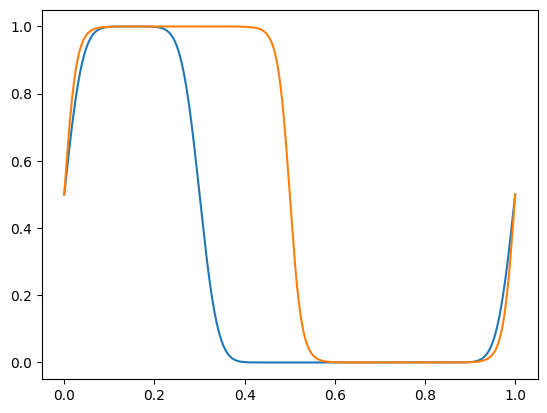

In [74]:

plt.plot(x,f.p_between_von_mises(a = 0 , b = 0.3, kappa = 25 , x = x) )
plt.plot(x, 1/2+1/2*(np.tanh(6*np.sin(2*np.pi*x))))

In [75]:
#detect ranges for each observation by moving the joints randomly and recording the min and max values
cassie = CassieEnv({})
cassie.reset()
for i in range(100):
    observation, reward, terminated, _, info = cassie.step(cassie.action_space.sample())
    if(i==0 and ranges is None):
        ranges = np.array([observation,observation],dtype=np.float16)
    else:
        ranges[0,:] = np.minimum(ranges[0,:],observation)
        ranges[1,:] = np.maximum(ranges[1,:],observation)


In [76]:
ranges

array([[ 0.05017,  0.1935 ,  0.01752,  0.02289,  0.2588 ,  0.4373 ,
         0.2081 ,  0.3247 ,  0.11   ,  0.23   ,  0.0794 ,  0.04105,
         0.4812 ,  0.3677 ,  0.1458 ,  0.5337 ,  0.219  ,  0.3083 ,
         0.2844 ,  0.6274 ,  0.372  ,  0.4194 ,  0.4587 , -0.9946 ,
        -1.     ],
       [ 0.8794 ,  0.913  ,  0.9634 ,  0.909  ,  0.9976 ,  0.5806 ,
         0.8145 ,  0.9844 ,  0.919  ,  0.8506 ,  0.9683 ,  0.915  ,
         0.998  ,  0.5903 ,  0.8525 ,  0.985  ,  0.817  ,  0.8276 ,
         0.692  ,  1.     ,  0.682  ,  0.966  ,  0.581  ,  0.9946 ,
         1.     ]], dtype=float16)

In [77]:
cassie.reset()

(array([0.4179753 , 0.56207651, 0.40519259, 0.81590036, 1.0123376 ,
        0.49509668, 0.25537745, 0.99768826, 0.56362097, 0.49516323,
        0.40710227, 0.81656471, 1.0185254 , 0.50289983, 0.25365217,
        1.00284551, 0.49994932, 0.49054938, 0.49983539, 0.99996135,
        0.49851914, 0.50422524, 0.50431324, 0.        , 1.        ]),
 {})

In [78]:
obs_ranges = np.array([np.floor(ranges[0,:]),np.ceil(ranges[1,:])],np.float16)

In [79]:
obs_ranges

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]],
      dtype=float16)

# Randomized moveoemnt 

In [44]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({"r":0.3})
obs,_ = env.reset(seed = np.random.randint(0,1000))
print(env.phi)
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []

C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
for i in range(max_steps):

    action = cassie.action_space.sample()
    obs, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    # for metric,value in env.used_quantities.items():
    #     if metric not in metrics.keys():
    #         metrics[metric] = [value]
    #     else:
    #         metrics[metric].append(value)

    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)

env.close()
#save video 
media.show_video( frames, fps=30)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])

0


AttributeError: 'CassieEnv' object has no attribute 'used_quantities'

In [81]:
import loader as l 
loader = l.Loader()
config  = loader.load_config("dict_config_test.yaml")

{'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 50000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 9000, 'num_sgd_iter': 5, 'shuffle_sequences': True, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'kl_target': 0.01, 'vf_clip_param': 1000.0, 'env': 'cassie-v0', 'disable_env_checking': True, 'clip_actions': True, 'framework': 'torch', 'num_rollout_workers': 1, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'recreate_failed_workers': True, 'observation_filter': 'MeanStdFilter', 'evaluation_interval': 2, 'evaluation_duration': 10, 'num_gpus': 0, 'num_cpus_per_worker': 1}


In [82]:
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.registry import register_env

In [83]:
register_env("cassie-v0", lambda config: CassieEnv(config))

In [84]:

import ray 
ray.init(ignore_reinit_error=True)
trainer = PPOConfig().from_dict(config).build()


2023-06-11 00:10:23,415	INFO worker.py:1474 -- Calling ray.init() again after it has already been called.
2023-06-11 00:10:35,824	INFO trainable.py:173 -- Trainable.setup took 12.399 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-06-11 00:10:35,826	WARNING util.py:68 -- Install gputil for GPU system monitoring.


In [85]:
from caps import *

In [86]:
trainer.get_default_policy_class = lambda : CAPSTorchPolicy

In [87]:
import tensorboardX

In [88]:
trainer.get_default_policy_class

<function __main__.<lambda>()>

In [89]:
type(trainer)

ray.rllib.algorithms.ppo.ppo.PPO

In [90]:
trainer.load_checkpoint("checkpoint_000460")

ModuleNotFoundError: No module named 'ray.rllib.algorithms.ppo.ppo_learner_config'

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({})
obs,_ = env.reset(seed = np.random.randint(0,1000))
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
rewards = {}
foot_pos = []
filterfn = trainer.workers.local_worker().filters["default_policy"]
C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
force_squared = []
for i in range(max_steps):
    
    obs = filterfn(obs)
    action = trainer.compute_single_action(obs)
    obs, reward, terminated, _, info = env.step(action)
    foot_pos.append(env.data.xpos[13,2])
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
    for reward,value in info['custom_rewards'].items():
        if reward not in rewards.keys():
            rewards[reward] = [value]
        else:
            rewards[reward].append(value)
    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)
    if(env.exponents['q_left_frc']>0):
 
        force_squared.append(env.exponents['q_left_frc'])
env.close()
#save video 
media.show_video( frames, fps=30)

#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(12, 1, figsize=(10, 10))

axs[0].plot(rewards["r_biped"],color = np.random.rand(3,))
axs[0].legend(["r_biped"])
axs[1].plot(metrics["q_left_frc"],color = np.random.rand(3,))
axs[1].legend(["q_left_frc"])
axs[2].plot(metrics["q_right_frc"],color = np.random.rand(3,))
axs[2].legend(["q_right_frc"])
axs[3].plot(metrics["q_left_spd"],color = np.random.rand(3,))
axs[3].legend(["q_left_spd"])
axs[4].plot(metrics["q_right_spd"],color = np.random.rand(3,))
axs[4].legend(["q_right_spd"])
axs[5].plot(C["C_frc_left"],color = np.random.rand(3,))
axs[5].legend(["C_frc_left"])
axs[6].plot(C["C_frc_right"],color = np.random.rand(3,))
axs[6].legend(["C_frc_right"])
axs[7].plot(C["C_spd_left"],color = np.random.rand(3,))
axs[7].legend(["C_spd_left"])
axs[8].plot(C["C_spd_right"],color = np.random.rand(3,))
axs[8].legend(["C_spd_right"])
axs[9].plot(foot_pos)
axs[9].legend(["foot_pos"])
axs[10].plot(metrics["q_phase_left"])
axs[10].legend(["q_phase_left"])
axs[11].plot(metrics["q_phase_right"])
axs[11].legend(["q_phase_right"])
plt.show()

fig, axs = plt.subplots(len(rewards.keys()), 1, figsize=(10, 10))
print("Left_Force mean " ,np.mean(force_squared), "Std" , np.std(force_squared), "max", np.max(force_squared), "min", np.min(force_squared))
for i, metric in enumerate(rewards.keys()):
    # if(metric == "r_biped"):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(rewards[metric], color=s)
    axs[i].legend([metric])
    
plt.show()
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):

    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])





: 

In [ ]:
cassie.reset()

first_values=[]
for i in range(200):
    cassie.step(np.zeros(10,) )
    print(len([x for x in cassie.data.cfrc_ext if np.linalg.norm(x)>0.0]))
    if(cassie.exponents["q_right_frc"]>0 or cassie.exponents["q_left_frc"]>0):
        print("i : ", i)
        force = cassie.exponents["q_right_frc"] if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"]
        print("FRC_"+ "right" if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"] , force)
                
        # print(cassie.data.cfrc_ext[1])
        # print(cassie.data.cfrc_ext[4])
    
        #look for the closest value to the force in the external forces

        
    print([np.round(np.linalg.norm(cassie.data.cfrc_ext[j]),2) for j in range(len(cassie.data.cfrc_ext))])

    # if(i==0):
    #     first_values = deepcopy(cassie.data.cfrc_ext)
    # else: 
    #     for j in range(len(first_values)):
    #         if(np.linalg.norm(cassie.data.cfrc_ext[j]-first_values[j])!=0):
    #             print(j, np.linalg.norm(cassie.data.cfrc_ext[j]), np.linalg.norm(first_values[j]))

: 

: 

In [ ]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()
media.show_image(cassie.render())

: 

In [ ]:
cassie.data.qpos

: 

In [ ]:
x = cassie.data.qpos

#find values that are equal in absolute value
for i in range(len(x)):
    for j in range(len(x)):
        if(i!=j):
            if(np.abs(np.abs(x[i])-np.abs(x[j]))<0.0000001):
                print(i,j, x[i], x[j])

: 

In [ ]:
import mujoco as m

: 

In [ ]:
cassie.reset()
cassie.render_mode = "rgb_array"
frames = []

feet_in_contact = []
for i in range(200):
    cassie.step(np.zeros(10,)) 
    # print('number of contacts', cassie.data.ncon)
    contacts = [contact.geom2 for contact in cassie.data.contact]
    if( 49 in contacts):
        print(contacts.index(49))
        contact_force_left_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(49), contact_force_left_foot)
        print(contact_force_left_foot)
    if(33 in contacts):
        print(contacts.index(33))
        contact_force_right_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(33), contact_force_right_foot)
        print(contact_force_right_foot)
    # if( 49 in contacts):
    #     if("Right" not in feet_in_contact):
    #         feet_in_contact.append("Right")
    # else:
    #     if("Right" in feet_in_contact):
    #         feet_in_contact.remove("Right")
    #     # print('LEFT_FOOT',end=" ")
    # if(33 in contacts):
    #     if("Left" not in feet_in_contact):
    #         feet_in_contact.append("Left")
    # else:
    #     if("Left" in feet_in_contact):

    # feet_in_contact.remove("Left")
    # print(feet_in_contact)
    # # Feet Contact Forces

    # contact_force_left_foot = np.zeros(6)
    # m.mj_contactForce(cassie.model, cassie.data, 1, contact_force_left_foot)
    # frames.append(cassie.render())

media.show_video( frames, fps=10)

: 

In [ ]:
33 droite 
49 gauche

: 

In [ ]:
cassie = CassieEnv({})

: 

In [ ]:
cassie.reset()

: 

In [ ]:
right 25
left 13

: 

In [ ]:

cassie.step(np.zeros(10,))
z = cassie.data.xpos[:,2]
y = cassie.data.xpos[:,1]

plt.scatter(y,z)
#add labels to the points
for i in range(len(y)):
    plt.annotate(i, (y[i], z[i]))

: 

In [ ]:
print(cassie.data.xpos[:,2])
cassie.step(cassie.action_space.sample())
media.show_image(cassie.render())
print(cassie.data.xpos[:,2])

print(np.argsort(cassie.data.xpos[:,2]))
print(np.argsort(cassie.data.xpos[:,1]))
print(np.argsort(cassie.data.xpos[:,0]))

: 

In [ ]:
len(cassie.data.sensordata)

: 

: 